### Exemplo: No nosso caso, vamos ver a performance de uma carteira de ativos. Vamos chamar de carteira do Lira.

- Temos o arquivo 'Carteira.xlsx' com os ativos e suas respectivas quantidades
- Vamos analisar como que os ativos performaram, quanto que rendeu a carteira como um todo e comparar com o IBOV

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

carteira = pd.read_excel('Carteira.xlsx')
display(carteira)

,Ativos,Tipo,Qtde
0,BOVA11,ETF,100
1,SMAL11,ETF,100
2,MGLU3,Ação,1000
3,BBDC4,Ação,100
4,ITUB4,Ação,100
5,ENEV3,Ação,300
6,MOVI3,Ação,100
7,BPAC11,Ação,100
8,GNDI3,Ação,100
9,NTCO3,Ação,100


### Criando nosso dataframe de Cotações dos ativos da carteira

In [16]:
cotacoes_carteira = pd.DataFrame()
for ativo  in carteira['Ativos']:
    cotacoes_carteira[ativo] = web.DataReader('{}.SA'.format(ativo), data_source = 'yahoo', start = '2020-01-01', end = '2020-11-10')['Adj Close']
display(cotacoes_carteira)


,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,GNDI3,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,,
2020-01-02,114.239998,139.500000,12.029735,31.731157,35.783100,10.9650,18.905201,18.235773,70.915001,38.330002,126.190002,149.000000,199.600006,NaN
2020-01-03,113.800003,140.899994,11.922436,31.745754,35.406723,11.0675,19.407282,18.288696,72.241066,41.000000,127.699997,147.000000,199.600006,NaN
2020-01-06,112.589996,139.100006,11.932190,31.178709,34.879822,11.3500,19.478941,18.262236,69.262360,40.130001,126.699997,148.559998,197.979996,NaN
2020-01-07,112.239998,139.399994,11.898049,30.637056,34.070618,11.2650,19.440060,18.335093,66.897202,40.779999,126.870003,143.830002,198.750000,NaN
2020-01-08,111.949997,138.199997,12.263843,30.163122,33.515480,11.2125,19.537262,18.172602,67.293045,40.990002,124.570000,139.470001,187.500000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-04,94.160004,112.000000,26.143793,17.682962,24.057827,14.4000,18.020937,18.344759,71.288712,47.669998,107.500000,126.970001,158.380005,127.660004
2020-11-05,96.949997,115.900002,27.401571,17.956589,24.625589,14.6775,19.070702,19.155304,72.212219,50.279999,107.500000,128.380005,158.179993,127.959999
2020-11-06,97.190002,117.510002,27.281780,17.913828,24.596722,14.7925,19.663622,19.365267,73.344261,50.630001,107.349998,128.029999,158.440002,130.000000


### Será que todos os dados vieram corretos?

In [17]:
cotacoes_carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 215 entries, 2020-01-02 to 2020-11-10
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BOVA11  215 non-null    float64
 1   SMAL11  215 non-null    float64
 2   MGLU3   215 non-null    float64
 3   BBDC4   215 non-null    float64
 4   ITUB4   215 non-null    float64
 5   ENEV3   215 non-null    float64
 6   MOVI3   215 non-null    float64
 7   BPAC11  215 non-null    float64
 8   GNDI3   215 non-null    float64
 9   NTCO3   215 non-null    float64
 10  BCRI11  215 non-null    float64
 11  VILG11  215 non-null    float64
 12  KNRI11  215 non-null    float64
 13  XPLG11  110 non-null    float64
dtypes: float64(14)
memory usage: 25.2 KB


### Ajustando os dados

In [21]:
# fillna() -> preenche os valores nulos ou vazios com a média
# ffill() ou bfill() - > preenche a coluna vazia de acordo com o ultimo valor da tabela

#df_media = cotacoes_carteira.mean()  -> 1ª maneira de preencher os valores vazios e media
#cotacoes_carteira = cotacoes_carteira.fillna(df_media) -> 1ªmaneira de preencher os valores vazios e media
cotacoes_carteira = cotacoes_carteira.bfill()
cotacoes_carteira.info()




<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 215 entries, 2020-01-02 to 2020-11-10
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BOVA11  215 non-null    float64
 1   SMAL11  215 non-null    float64
 2   MGLU3   215 non-null    float64
 3   BBDC4   215 non-null    float64
 4   ITUB4   215 non-null    float64
 5   ENEV3   215 non-null    float64
 6   MOVI3   215 non-null    float64
 7   BPAC11  215 non-null    float64
 8   GNDI3   215 non-null    float64
 9   NTCO3   215 non-null    float64
 10  BCRI11  215 non-null    float64
 11  VILG11  215 non-null    float64
 12  KNRI11  215 non-null    float64
 13  XPLG11  215 non-null    float64
dtypes: float64(14)
memory usage: 25.2 KB


### Vamos ver como que as ações foram individualmente

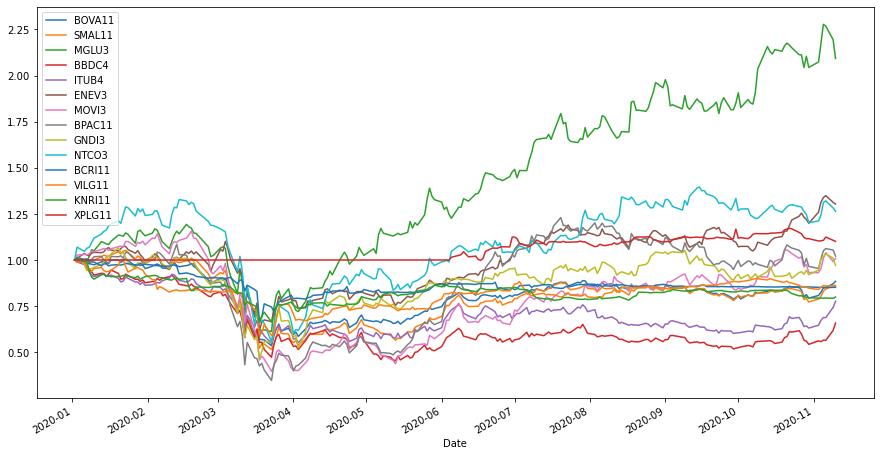

In [26]:
# iloc [0] -> equivale a linha de indice 0
carteira_normalizada = cotacoes_carteira / cotacoes_carteira.iloc[0]
carteira_normalizada.plot(figsize = (15,8))
plt.legend(loc= 'upper left') #colocar as legendas do lado esquerdo

### Vamos puxar o IBOV para comparar

In [27]:
cotacao_ibov = web.DataReader('^BVSP', data_source= 'yahoo', start = '2020-01-01', end = '2020-11-10' )
display(cotacao_ibov)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,118573,115649,115652,118573,5162700,118573
2020-01-03,118792,117341,118564,117707,6834500,117707
2020-01-06,117707,116269,117707,116878,6570000,116878
2020-01-07,117076,115965,116872,116662,4854100,116662
2020-01-08,117335,115693,116667,116247,5910500,116247
...,...,...,...,...,...,...
2020-11-04,98296,95987,95992,97811,10704600,97811
2020-11-05,100922,97872,97873,100774,10455300,100774
2020-11-06,100928,99837,100751,100799,8382800,100799


### Criando um dataframe da Carteira com as quantidades de ações

In [65]:
valor_investido = pd.DataFrame()
for ativo in carteira['Ativos']:
    valor_investido[ativo] = cotacoes_carteira [ativo] * carteira.loc[carteira['Ativos']==ativo, 'Qtde'].values[0]
display(valor_investido)

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,GNDI3,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,,
2020-01-02,11423.999786,13950.000000,12029.734612,3173.115730,3578.310013,3289.500046,1890.520096,1823.577309,7091.500092,3833.000183,12619.000244,14900.000000,19960.000610,11561.000061
2020-01-03,11380.000305,14089.999390,11922.435760,3174.575424,3540.672302,3320.250034,1940.728188,1828.869629,7224.106598,4100.000000,12769.999695,14700.000000,19960.000610,11561.000061
2020-01-06,11258.999634,13910.000610,11932.189941,3117.870903,3487.982178,3405.000114,1947.894096,1826.223564,6926.235962,4013.000107,12669.999695,14855.999756,19797.999573,11561.000061
2020-01-07,11223.999786,13939.999390,11898.049355,3063.705635,3407.061768,3379.500103,1944.005966,1833.509254,6689.720154,4077.999878,12687.000275,14383.000183,19875.000000,11561.000061
2020-01-08,11194.999695,13819.999695,12263.842583,3016.312218,3351.548004,3363.749886,1953.726196,1817.260170,6729.304504,4099.000168,12456.999969,13947.000122,18750.000000,11561.000061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-04,9416.000366,11200.000000,26143.793106,1768.296242,2405.782700,4319.999886,1802.093697,1834.475899,7128.871155,4766.999817,10750.000000,12697.000122,15838.000488,12766.000366
2020-11-05,9694.999695,11590.000153,27401.571274,1795.658875,2462.558937,4403.249931,1907.070160,1915.530396,7221.221924,5027.999878,10750.000000,12838.000488,15817.999268,12795.999908
2020-11-06,9719.000244,11751.000214,27281.780243,1791.382790,2459.672165,4437.749863,1966.362190,1936.526680,7334.426117,5063.000107,10734.999847,12802.999878,15844.000244,13000.000000


### Comparação Carteira x IBOV

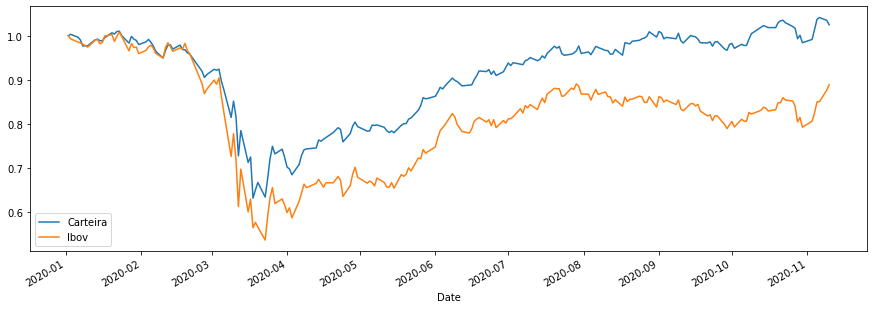

In [73]:
valor_investido['Total'] = valor_investido.sum(axis= 1)

valor_investido_normalizado = valor_investido / valor_investido.iloc[0]
cotacao_ibov_normalizado = cotacao_ibov / cotacao_ibov.iloc[0]

valor_investido_normalizado['Total'].plot(figsize = (15,5), label='Carteira')
cotacao_ibov_normalizado['Adj Close'].plot(label = 'Ibov')
plt.legend()
plt.show()

In [78]:
retorno_carteira = valor_investido['Total'][-1] / valor_investido ['Total'][0] -1
retorno_ibov = cotacao_ibov ['Adj Close'][-1] / cotacao_ibov ['Adj Close'][0] -1
print(' O Retorno da Carteira foi de : {:.2%}'.format(retorno_carteira))
print(' O Retorno da IBOV foi de : {:.2%}'.format(retorno_ibov))

 O Retorno da Carteira foi de : 2.48%
 O Retorno da IBOV foi de : -11.15%


### Correlação da Carteira com o IBOV

In [79]:
correlacao = valor_investido['Total'].corr(cotacao_ibov['Adj Close'])
print(correlacao)

0.8698338617687391
